In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
input_path = r'/Volumes/Behaviour/Tailored 3sec 2P Trials'
output_path = r'/Volumes/Behaviour/Tailored 3sec 2P Trials/Random Forest Classifier'
stimuli = ['warm', 'hot', 'opto', 'off-target', 'von frey', 'pin-prick', 'approach', 'no stim']
mice = ['2P05', '2P06', '2P07', '2P08', '2P09', '2P10', '2P11']
sessions = [session for session in os.listdir(input_path) if session.endswith('.csv')]
len(sessions)

48

In [10]:
session_names = []
accuracies = []

for session in sessions:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    if session.endswith('2P08_Ses03.csv'): # doens't have opto trials ...
        continue
    
    print('processing: ', session)
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[3]+'_'+entries[4][:3]
        
    else:
        ses_name = entries[3]+'_'+entries[4][:5]
            
    print(ses_name)
    session_names.append(ses_name)
    
    cells = pd.read_csv(os.path.join(input_path,session), index_col=0)
    cell_ids = list(cells.columns)
    
    trials = cells['identifier'].unique()
    
    pre = pd.DataFrame(columns = cell_ids[:-1])
    post = pd.DataFrame(columns = cell_ids[:-1])
    
    for t, trial in enumerate(trials):
        data = cells[cells['identifier']==trial]
        preS = data[:10]
        postS = data[10:]
            
        pre = pd.concat([pre, preS], axis=0)
        post = pd.concat([post, postS], axis=0)
    
    # Add 'modality' column
    conditions = [
    pre['identifier'].str.contains('hot'), pre['identifier'].str.contains('warm'), pre['identifier'].str.contains('opto'),
    pre['identifier'].str.contains('off-target'), pre['identifier'].str.contains('von frey'), pre['identifier'].str.contains('pin-prick'),
    pre['identifier'].str.contains('approach'), pre['identifier'].str.contains('no stim')
    ]

    values = ['hot', 'warm', 'opto', 'off-target', 'von frey', 'pin-prick', 'approach', 'no stim']

    pre['modality'] = np.select(conditions, values)
    
    conditions = [
    post['identifier'].str.contains('hot'), post['identifier'].str.contains('warm'), post['identifier'].str.contains('opto'),
    post['identifier'].str.contains('off-target'), post['identifier'].str.contains('von frey'), post['identifier'].str.contains('pin-prick'),
    post['identifier'].str.contains('approach'), post['identifier'].str.contains('no stim')
    ]

    values = ['hot', 'warm', 'opto', 'off-target', 'von frey', 'pin-prick', 'approach', 'no stim']

    post['modality'] = np.select(conditions, values)
    
    # MODALITY
    # Try a RFC on single session: baseline modality
    modality = np.array(pre['modality'])
    data = pre.drop(['identifier','modality'], axis=1)
    data = np.array(data)
    
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(data, modality, test_size=0.3,random_state=109) # 70% training and 30% test

    clf = RandomForestClassifier(n_estimators=100)

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    print("Accuracy modality pre:",metrics.accuracy_score(y_test, y_pred))
    accuracies.append([ses_name, 'pre','modality', metrics.accuracy_score(y_test, y_pred)])
    
    # Try a RFC on single session: stimulation modality
    modality = np.array(post['modality'])
    data = post.drop(['identifier','modality'], axis=1)
    data = np.array(data)
    
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(data, modality, test_size=0.3,random_state=109) # 70% training and 30% test

    clf = RandomForestClassifier(n_estimators=100)

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    print("Accuracy modality post:",metrics.accuracy_score(y_test, y_pred))
    accuracies.append([ses_name, 'post','modality', metrics.accuracy_score(y_test, y_pred)])
    
    # IDENTIFIER
    # Try a RFC on single session: baseline identifier
    identifier = np.array(pre['identifier'])
    data = pre.drop(['identifier','modality'], axis=1)
    data = np.array(data)
    
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(data, identifier, test_size=0.3,random_state=109) # 70% training and 30% test

    clf = RandomForestClassifier(n_estimators=100)

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    print("Accuracy identifier pre:",metrics.accuracy_score(y_test, y_pred))
    accuracies.append([ses_name, 'pre', 'identifier', metrics.accuracy_score(y_test, y_pred)])
    
    # Try a RFC on single session: stimulation identifier
    identifier = np.array(post['identifier'])
    data = post.drop(['identifier','modality'], axis=1)
    data = np.array(data)
    
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(data, identifier, test_size=0.3,random_state=109) # 70% training and 30% test

    clf = RandomForestClassifier(n_estimators=100)

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    print("Accuracy identifier post:",metrics.accuracy_score(y_test, y_pred))
    accuracies.append([ses_name, 'post', 'identifier', metrics.accuracy_score(y_test, y_pred)])

processing:  dF_F0_SHORT_2P06_Ses01.csv
2P06_Ses01
Accuracy modality pre: 1.0
Accuracy modality post: 1.0
Accuracy identifier pre: 1.0
Accuracy identifier post: 1.0
processing:  dF_F0_SHORT_2P06_Ses02.csv
2P06_Ses02
Accuracy modality pre: 0.9855072463768116
Accuracy modality post: 1.0
Accuracy identifier pre: 1.0
Accuracy identifier post: 1.0
processing:  dF_F0_SHORT_2P06_Ses03.csv
2P06_Ses03
Accuracy modality pre: 1.0
Accuracy modality post: 1.0
Accuracy identifier pre: 0.9848484848484849
Accuracy identifier post: 1.0
processing:  dF_F0_SHORT_2P05_Ses04.csv
2P05_Ses04
Accuracy modality pre: 0.875
Accuracy modality post: 0.7076923076923077
Accuracy identifier pre: 0.9722222222222222
Accuracy identifier post: 0.8461538461538461
processing:  dF_F0_SHORT_2P06_Ses04.csv
2P06_Ses04
Accuracy modality pre: 1.0
Accuracy modality post: 0.971830985915493
Accuracy identifier pre: 1.0
Accuracy identifier post: 1.0
processing:  dF_F0_SHORT_2P06_Ses05.csv
2P06_Ses05
Accuracy modality pre: 1.0
Accura

Accuracy modality pre: 0.9305555555555556
Accuracy modality post: 0.8461538461538461
Accuracy identifier pre: 0.9583333333333334
Accuracy identifier post: 0.9692307692307692
processing:  dF_F0_SHORT_2P11_CFA.csv
2P11_CFA
Accuracy modality pre: 1.0
Accuracy modality post: 0.8571428571428571
Accuracy identifier pre: 0.9855072463768116
Accuracy identifier post: 0.9523809523809523
processing:  dF_F0_SHORT_2P05_Ses03.csv
2P05_Ses03
Accuracy modality pre: 0.9305555555555556
Accuracy modality post: 0.7230769230769231
Accuracy identifier pre: 0.9861111111111112
Accuracy identifier post: 0.9384615384615385


In [12]:
cols = ['session', 'pre/post','classification', 'accuracy']
rfc_accuracy_pre_post = pd.DataFrame(accuracies, columns=cols)
rfc_accuracy_pre_post.to_csv(os.path.join(output_path, 'rfc_accuracies_pre_post.csv'))


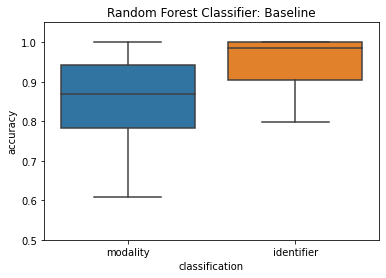

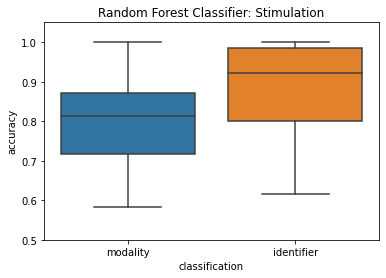

In [15]:
import seaborn as sns

baseline = rfc_accuracy_pre_post[rfc_accuracy_pre_post['pre/post']=='pre']
stimulation = rfc_accuracy_pre_post[rfc_accuracy_pre_post['pre/post'].str.contains('post')]

sns.boxplot(data=baseline, x='classification', y='accuracy')
plt.title('Random Forest Classifier: Baseline')
plt.ylim([0.5,1.05])
plt.savefig(os.path.join(output_path, 'rfc_baseline.png'),bbox_inches='tight')
plt.show()

sns.boxplot(data=stimulation, x='classification', y='accuracy')
plt.title('Random Forest Classifier: Stimulation')
plt.ylim([0.5,1.05])
plt.savefig(os.path.join(output_path, 'rfc_stimulation.png'),bbox_inches='tight')
plt.show()